# This file is an evaluation of the Conv3D neural network

There's two part in this file, the first part is a display on test data, on which we already reached 99.24% accuracy in Conv3D file. Here, we randomly select 10 moves from our training data, and predict on these moves, we choose 8 images uniformly-spaced for each move and put predicted labels on them.

In [ ]:
import tensorflow as tf

from keras import Sequential
from keras.layers import Conv3D, MaxPooling3D, Dense, Flatten, Dropout
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.models import model_from_json
from sklearn.cross_validation import train_test_split

import os
import cv2
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Display result on test data

In [ ]:
# load json file and create model
K.clear_session()

json_file = open('./Weight/model.json', 'r')
new_model = json_file.read()
json_file.close()
new_model = model_from_json(new_model)
# load weights into new model
new_model.load_weights("./Weight/model.h5")

In [ ]:
# Random select 10 data from Frame_Data to generate Test_Data
data_path = "./Frame_Data"
test_path = "./TFrame_Data"
if os.path.exists(test_path) == False:
    os.mkdir(test_path)
folder_list = os.listdir(data_path)
selected_list = []
while len(selected_list) < 10:
    folder = folder_list[np.random.randint(len(folder_list))]
    if folder not in selected_list:
        selected_list.append(folder)
for i in selected_list:
    person = np.random.randint(1, len(os.listdir(os.path.join(data_path, i)))+1)
    current_path = os.path.join(data_path, i, "person_"+str(person))
    shutil.copytree(current_path, os.path.join(test_path, i))

In [ ]:
def sort(obj):
    aux = []
    for i in obj:
        name = i.split(".")[0]
        aux.append(int(name))
    aux.sort()
    for j in range(len(obj)):
        obj[j] = str(aux[j])+".jpg"

In [ ]:
# Generate test data
Xtest = []
for folder in os.listdir(test_path):
    current_path = os.path.join(test_path, folder)
    serial = []
    imgList = os.listdir(current_path)
    sort(imgList)
    for item in imgList:
        if item.endswith(".jpg"):
            img = Image.open(os.path.join(current_path, item))
            img = np.array(img)
            serial.append(img)
    Xtest.append(serial)
Xtest = np.array(Xtest)
TestLook = Xtest

In [ ]:
# Predict test data
Xtest = Xtest.astype('float32')
Xtest -= np.mean(Xtest)
Xtest /= np.max(Xtest)

Ytest = new_model.predict(Xtest)
Ytest = np.argmax(Ytest, axis=1)

In [ ]:
# Get label
def getLabel(Ypredict):
    label = []
    for each in Ypredict:
        if int(each) == 11:
            label.append(20)
        elif int(each) == 12:
            label.append(30)
        elif int(each) == 13:
            label.append(40)
        elif int(each) == 14:
            label.append(50)
        elif int(each) == 15:
            label.append(60)
        elif int(each) == 16:
            label.append(70)
        elif int(each) == 17:
            label.append(80)
        elif int(each) == 18:
            label.append(90)
        elif int(each) == 19:
            label.append(100)
        else:
            label.append(int(each))
    return label

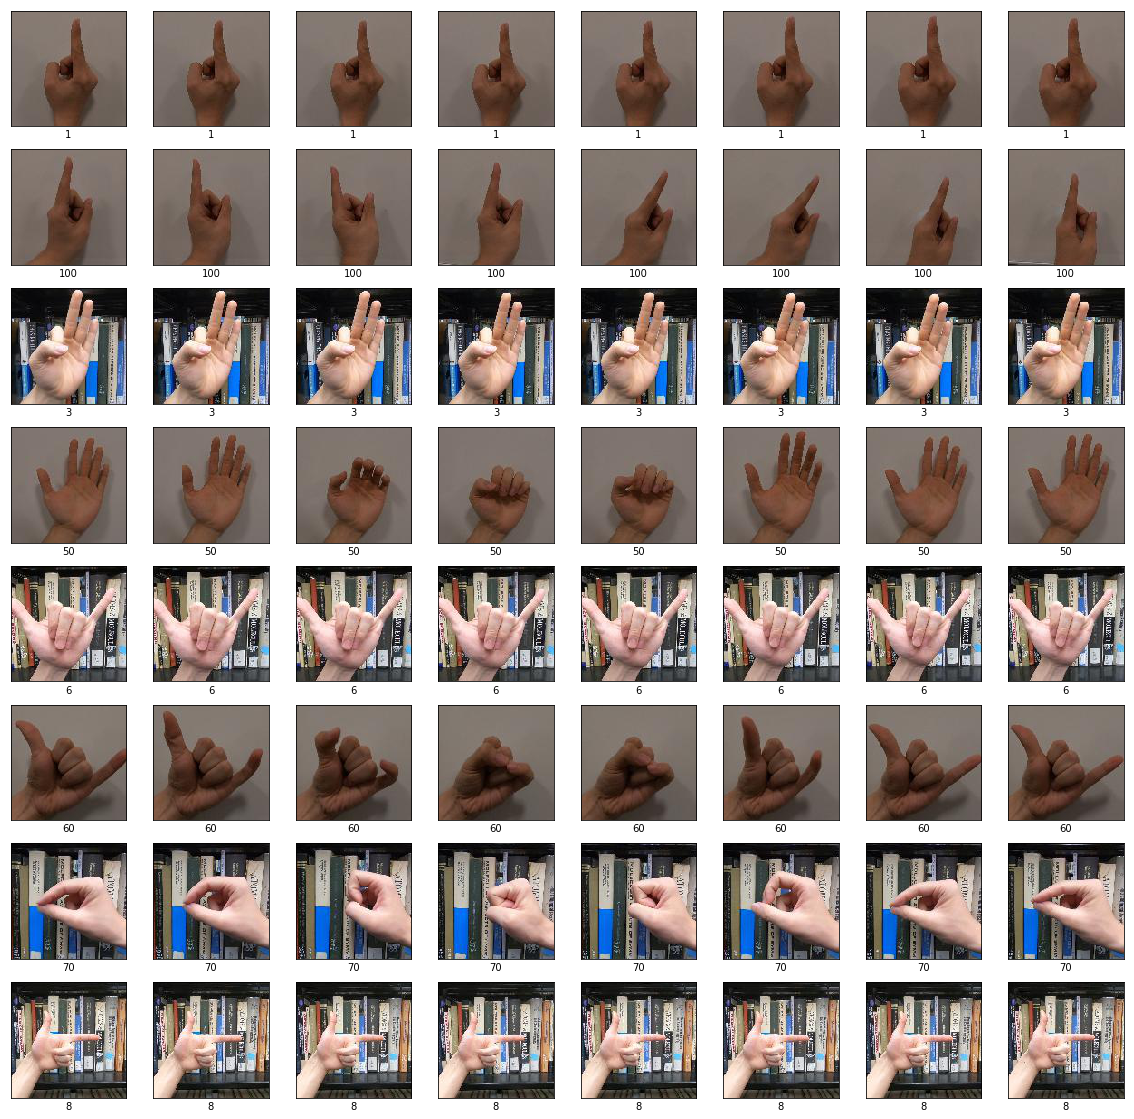

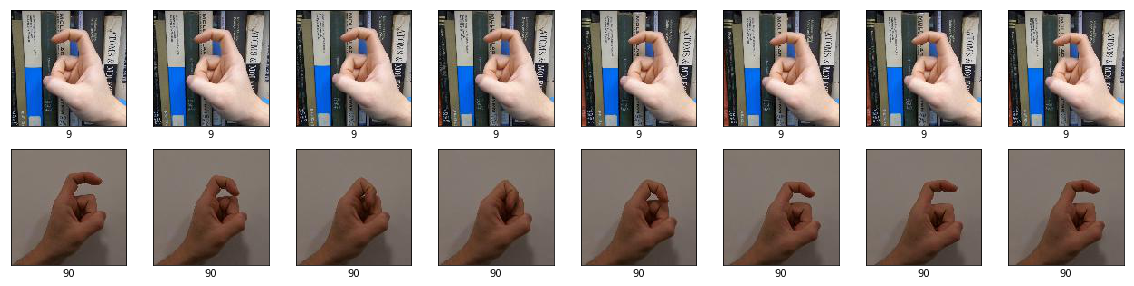

In [76]:
# Display results
nframe = 30
col = 8
row = 8

label = getLabel(Ytest)
nimage = TestLook.shape[0]
iteration = np.math.ceil(nimage/row)

for it in range(0,iteration):
    index = 1
    plt.figure(figsize=(20,20))
    if (it+1)*row <= nimage:
        irange = range(it*row, (it+1)*row)
    else:
        irange = range(it*row, nimage)
    for i in irange:
        for j in np.linspace(0, nframe-1, col, dtype=int):
            plt.subplot(row, col, index)
            plt.imshow(TestLook[i,j,:,:,:])
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(label[i])
            index += 1
    it += 1

## Part 2: Predict on query data and display

Query data is not in training data.

In [ ]:
# Generate query data
query_path = "./QFrame_Data"

Xquery = []
for folder in os.listdir(query_path):
    current_path = os.path.join(query_path, folder)
    serial = []
    imgList = os.listdir(current_path)
    sort(imgList)
    for item in imgList:
        if item.endswith(".jpg"):
            img = Image.open(os.path.join(current_path, item))
            img = np.array(img)
            serial.append(img)
    Xquery.append(serial)
Xquery = np.array(Xquery)
QueryLook = Xquery

In [ ]:
# Predict query data
Xquery = Xquery.astype('float32')
Xquery -= np.mean(Xquery)
Xquery /= np.max(Xquery)

Yquery = new_model.predict(Xquery)
Yquery = np.argmax(Yquery, axis=1)

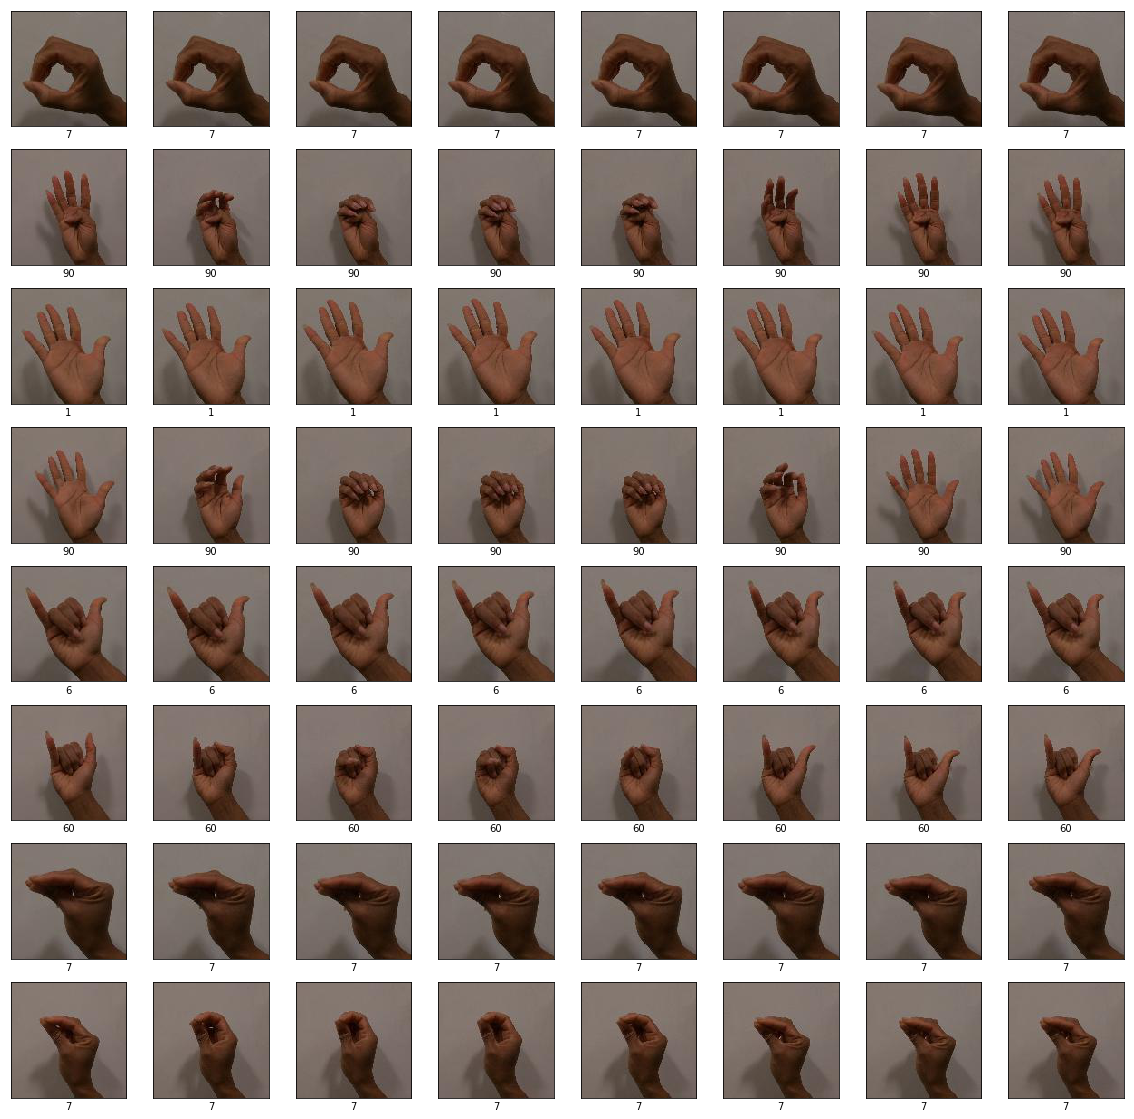

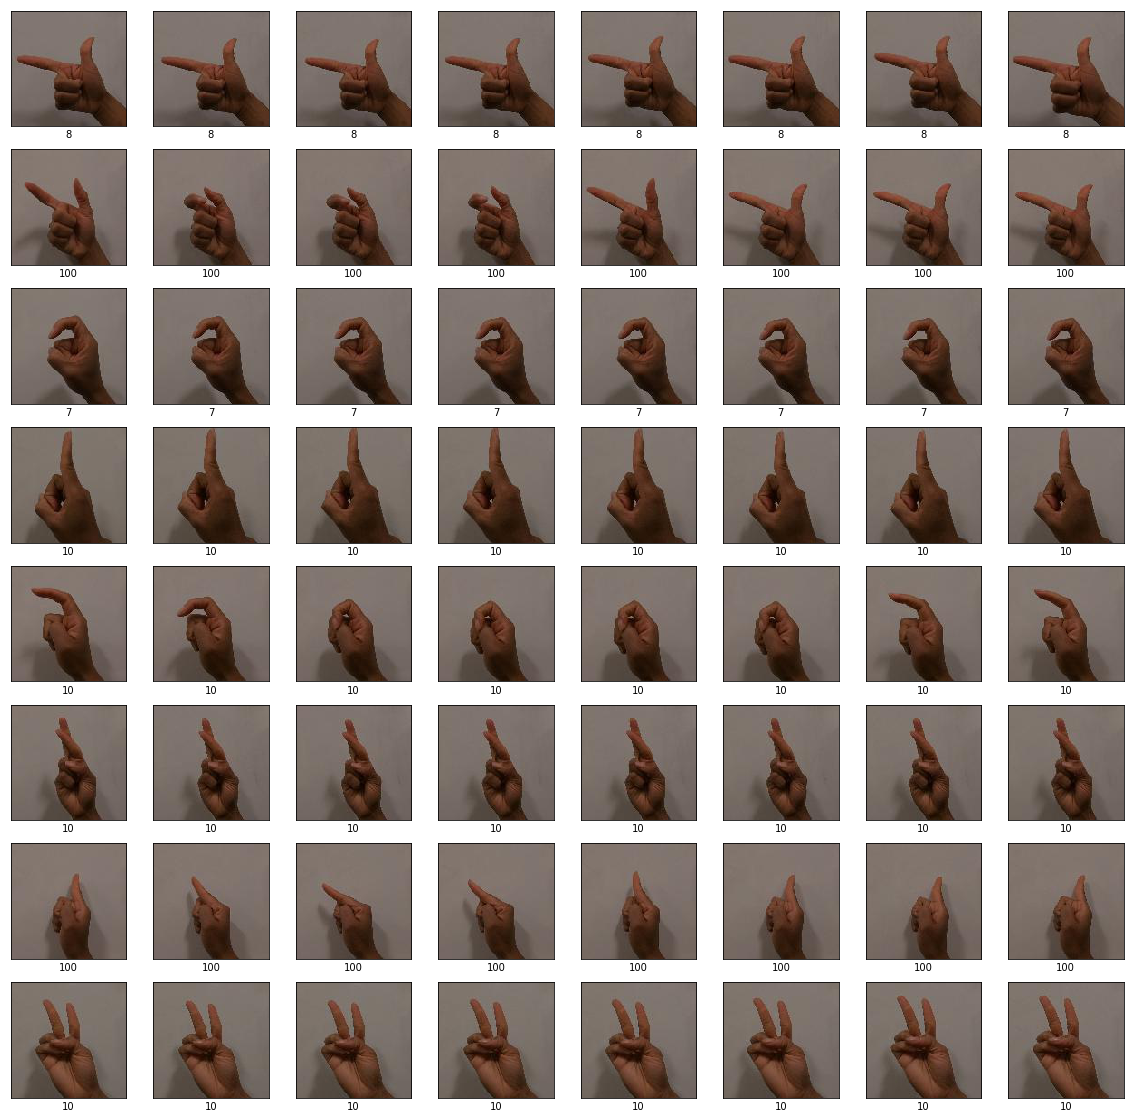

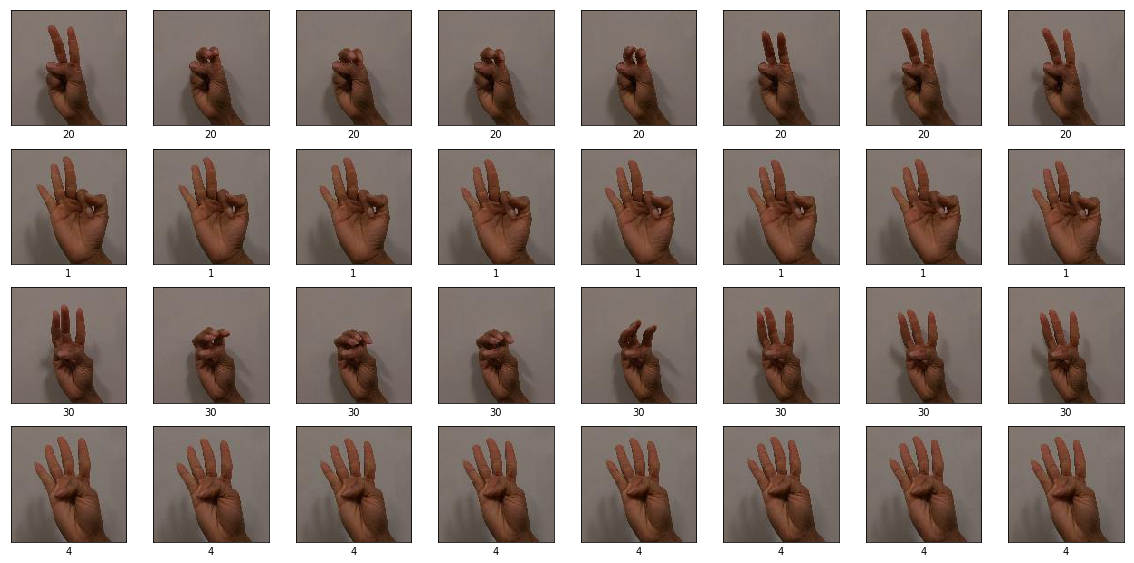

In [78]:
# Display results
nframe = 30
col = 8
row = 8

label = getLabel(Yquery)
nimage = QueryLook.shape[0]
iteration = np.math.ceil(nimage/row)

for it in range(0,iteration):
    index = 1
    plt.figure(figsize=(20,20))
    if (it+1)*row <= nimage:
        irange = range(it*row, (it+1)*row)
    else:
        irange = range(it*row, nimage)
    for i in irange:
        for j in np.linspace(0, nframe-1, col, dtype=int):
            plt.subplot(row, col, index)
            plt.imshow(QueryLook[i,j,:,:,:])
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(label[i])
            index += 1
    it += 1